<a href="https://colab.research.google.com/github/Rahulhimself/Netflix-Recommendation-System/blob/main/NetflixRecommendationSysytem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix Recommendation System

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Drive mount
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the first data ( Text file)
netflix_dataset=pd.read_csv("/content/Copy of combined_data_1.txt (1).zip",header=None , names=["Cust_Id" , "Rating"] , usecols=[0,1])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
netflix_dataset.isnull().sum()

,0
Cust_Id,0
Rating,4499


In [ ]:
# Geting the count of movies with the help of Cust Id and Rating columns
movie_count =netflix_dataset.isnull().sum()
movie_count=movie_count["Rating"]
movie_count

np.int64(4499)

In [ ]:
# calculate how many unique users are there
total_count =netflix_dataset["Cust_Id"].nunique()  #counting unique values

In [ ]:
total_count

475257

In [ ]:
customer_Count =total_count-movie_count

In [ ]:
rating_count= netflix_dataset["Cust_Id"].count()-movie_count
rating_count

np.int64(24053764)

In [ ]:
stars = netflix_dataset.groupby("Rating")["Rating"].agg(["count"]) #groupong rating based on number 1 to 5

In [ ]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


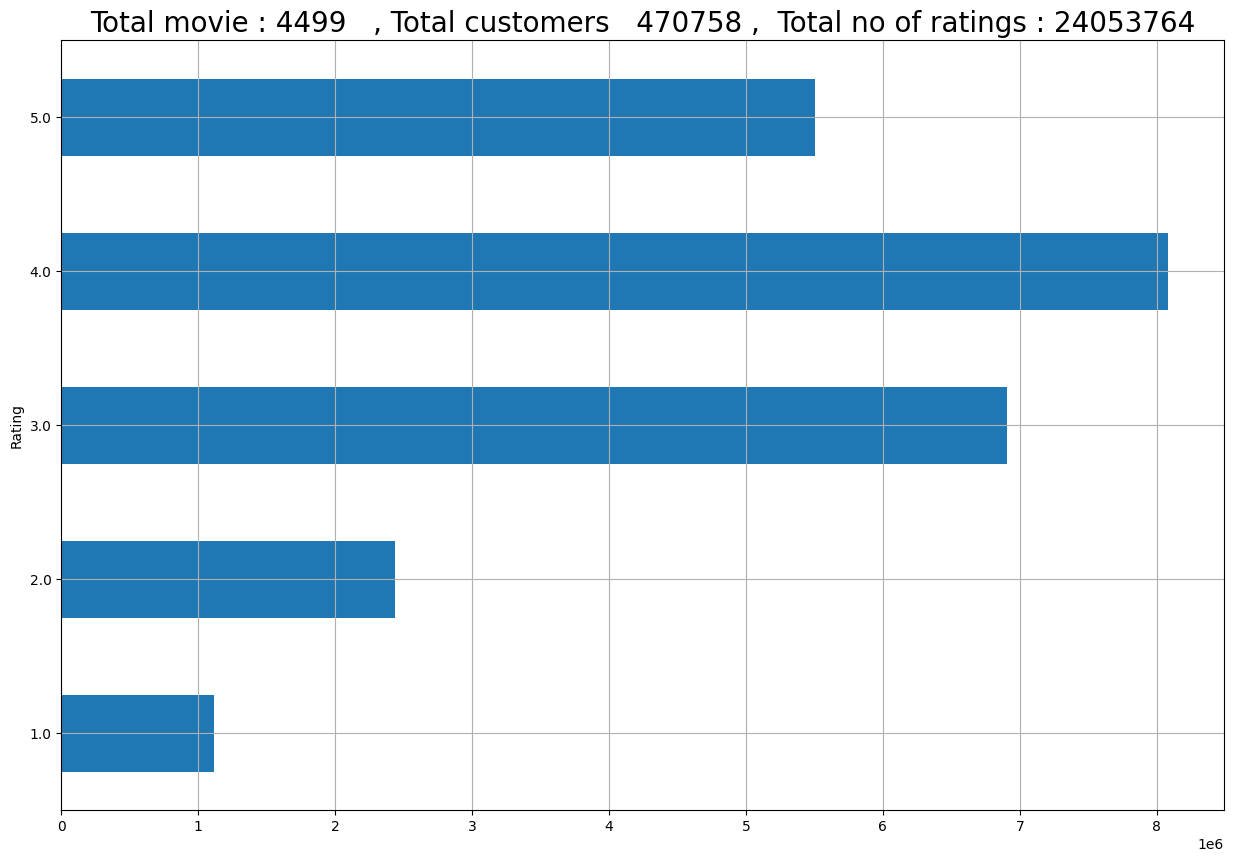

In [ ]:
ax= stars.plot(kind="barh",legend=False , figsize=(15,10))
plt.title(f'Total movie : {movie_count}   , Total customers   {customer_Count} ,  Total no of ratings : {rating_count}', fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
# Lets just make a clear dataframe to find how many movie id are there

movie_id=None
movie_np = [ ]  # Empty list to store all movie id

# Iterate over the dataframe rows
for i in netflix_dataset["Cust_Id"]:
  if ":" in i:
    movie_id = int(i.replace(":" , ''))
  movie_np.append(movie_id)

In [ ]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
netflix_dataset["Movie_Id"]=movie_np #new column to store movie id

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset = netflix_dataset[netflix_dataset["Rating"].notna()]

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [ ]:
netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)

/tmp/ipython-input-358752458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [ ]:
dataset_movie_summary = netflix_dataset.groupby("Movie_Id")["Rating"].agg(["count"])

In [ ]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
movie_benchmark = round(dataset_movie_summary["count"].quantile(0.6),0)  # Round off to how many decimal places 0 means 48 not 48.0
movie_benchmark

np.float64(908.0)

In [ ]:
# If any movie is having ratings less than 908 exclude that movie
drop_movie_list =dataset_movie_summary[dataset_movie_summary["count"] < movie_benchmark].index
drop_movie_list  # List that will store the index of all movie which are having ratings less than 908

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [ ]:
len(drop_movie_list)

2699

In [ ]:
dataset_cust_summary = netflix_dataset.groupby("Cust_Id")["Rating"].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark = round(dataset_cust_summary["count"].quantile(0.6),0)
cust_benchmark

np.float64(36.0)

In [ ]:
# If any user have rated less than 36 movie please remove them
drop_cust_list =dataset_cust_summary[dataset_cust_summary["count"] < cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [ ]:
len(drop_cust_list)

282042

In [ ]:
netflix_dataset= netflix_dataset[~netflix_dataset["Movie_Id"].isin(drop_movie_list)]
netflix_dataset= netflix_dataset[~netflix_dataset["Cust_Id"].isin(drop_cust_list)]

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [ ]:
df_title =pd.read_csv("/content/Copy of movie_titles.csv",encoding="ISO-8859-1",header=None , names=["Movie_Id" , "Year" , "Name"] , usecols=[0,1,2])
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
!pip install scikit-surprise

In [ ]:
from surprise import Reader , Dataset , SVD
from surprise.model_selection import cross_validate

In [ ]:
!pip install numpy==1.26.4

In [ ]:
reader=Reader()

In [ ]:
data = Dataset.load_from_df(netflix_dataset[["Cust_Id" , "Movie_Id" , "Rating"]][ :100000] ,reader)

In [ ]:
data

In [ ]:
model = SVD()

In [ ]:
cross_validate(model ,data , measures=["RMSE"],cv=3)

{'test_rmse': array([1.01785406, 1.01514297, 1.02378788]),
 'fit_time': (2.2302045822143555, 3.703418254852295, 1.7977089881896973),
 'test_time': (0.30928754806518555, 1.4669153690338135, 0.1541593074798584)}

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


Recommendations

In [ ]:
user_rating =netflix_dataset[netflix_dataset["Cust_Id"]==1331154]
user_rating

,Cust_Id,Rating,Movie_Id
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


In [ ]:
# Make a copy of each individual customer for recommnedation
user_1331154=df_title.copy()
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1331154 = user_1331154[~user_1331154["Movie_Id"].isin(drop_movie_list)]

In [ ]:
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1331154["Estimated_Score"]= user_1331154["Movie_Id"].apply(lambda x:model.predict(1331154 ,x).est)

/tmp/ipython-input-2665579444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154["Estimated_Score"]= user_1331154["Movie_Id"].apply(lambda x:model.predict(1331154 ,x).est)


In [ ]:
user_1331154

,Movie_Id,Year,Name,Estimated_Score
2,3,1997.0,Character,3.757478
4,5,2004.0,The Rise and Fall of ECW,3.293585
5,6,1997.0,Sick,3.523306
7,8,2004.0,What the #$*! Do We Know!?,2.585211
15,16,1996.0,Screamers,2.986039
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.592994
17766,17767,2004.0,Fidel Castro: American Experience,3.592994
17767,17768,2000.0,Epoch,3.592994
17768,17769,2003.0,The Company,3.592994


In [ ]:
# Display top 5 movies with highest estimates score that user 1331154 can like ?
user_1331154.sort_values("Estimated_Score",ascending=False)

,Movie_Id,Year,Name,Estimated_Score
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.185185
27,28,2002.0,Lilo and Stitch,4.138699
2,3,1997.0,Character,3.757478
29,30,2003.0,Something's Gotta Give,3.693950
12741,12742,1984.0,Cat on a Hot Tin Roof,3.592994
...,...,...,...,...
23,24,1981.0,My Bloody Valentine,3.085171
15,16,1996.0,Screamers,2.986039
25,26,2004.0,Never Die Alone,2.873248
16,17,2005.0,7 Seconds,2.858424


In [ ]:
user_1331154.head(20)

,Movie_Id,Year,Name,Estimated_Score
2,3,1997.0,Character,3.757478
4,5,2004.0,The Rise and Fall of ECW,3.293585
5,6,1997.0,Sick,3.523306
7,8,2004.0,What the #$*! Do We Know!?,2.585211
15,16,1996.0,Screamers,2.986039
16,17,2005.0,7 Seconds,2.858424
17,18,1994.0,Immortal Beloved,3.513523
23,24,1981.0,My Bloody Valentine,3.085171
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.185185
25,26,2004.0,Never Die Alone,2.873248
